In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')                                                   # mounting google drive to the file to access the data

Mounted at /content/drive


In [3]:
# installing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import string
import nltk
from nltk import punkt
import nltk.downloader
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stopWords = set(stopwords.words('english'))

In [8]:
root_dir = 'drive/My Drive'                                                     # root directory of the dataset
local_path = '/ISOT/'                                                           # folder of the stored ISOT dataset
data_dir = root_dir + local_path


data_path_real = data_dir + 'True.csv'                                          # defined path to the training data for real news
data_path_fake = data_dir + 'Fake.csv'                                          # defined path to the training data for fake news

In [9]:
train_set_real= pd.read_csv(data_path_real)                                     # reading the csv file for real news content
train_set_real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [10]:
train_set_real = train_set_real.assign(label='1')                               # adding label 1 for all news thats real
train_set_real.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [11]:
train_set_real.shape

(21417, 5)

In [12]:
train_set_real.isnull().sum()                                                   # checking for null values in all columns of real news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
train_set_real.title.duplicated().sum()                                               # checking for duplicated values in all columns of real news

591

In [14]:
train_set_real.text.duplicated().sum() 

225

In [15]:
train_set_real.duplicated().sum() 

206

In [16]:
train_set_real.drop_duplicates()                                                # dropping duplicates in all columns of real news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [17]:
train_set_fake= pd.read_csv(data_path_fake)                                     # reading the csv file for fake news content
train_set_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [18]:
train_set_fake = train_set_fake.assign(label='0')                               # adding label 0 for all news thats fake
train_set_fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [19]:
train_set_fake.shape

(23481, 5)

In [20]:
train_set_fake.isnull().sum()                                                   # checking for null values in all columns of fake news

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [21]:
train_set_fake.duplicated().sum()  

3

In [22]:
train_set_fake.drop_duplicates()                                                # dropping duplicates in all columns of fake news

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [23]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

In [24]:
import re

def lower_case (text):
    return text.lower()                                                         # converting text to lower case


def remove_number (text):                                                       # removing numbers from the text corpus
    text_new=""
    for num in text:
        if num.isdigit()==False:
            text_new=text_new+num
    return text_new


def remove_punctutaion(text):                                                   # removing punctuation 
    text_new=''
    for punc in text:
        if punc not in string.punctuation:
            text_new=text_new+punc
    return text_new


def remove_special_characters(text):                                            # Removing special characters
    text_new=''
    for char in text:
        if (char.isalnum()==True) or (char==' '):
            text_new=text_new+char
    return(text_new)


def remove_stopwords(text):                                                     # Removing english stopwords
    text_new=[]
    for word in text.split():
        if word not in stopwords.words('english'):
            text_new.append(word)
    return " ".join(text_new)


def stemming(text):                                                             # Stemming words to root words
    wordlist = word_tokenize(text)
    post_stem = [ps.stem(word) for word in wordlist]
    return ' '.join(post_stem)

 
def remove_whitespace(text):                                                    # Removing extra whitespaces
    return(wst.tokenize(text))


def remove_news_name(x):
    new=[]
    for a in x.split():
        if a not in ('video'):
            new.append(a)

    return " ".join(new)

def compose(f, g):
    return lambda x: f(g(x))

In [25]:
final=compose(compose(compose(compose(compose(compose(compose(remove_whitespace,stemming),remove_news_name),remove_stopwords),remove_special_characters),remove_punctutaion),remove_number),lower_case)

In [26]:
real = train_set_real.loc[train_set_real['label'] == '1'].sample(n=15000)        # taking 70% data as sample data from the real news dataset

In [27]:
real.shape

(15000, 5)

In [28]:
fake = train_set_fake.loc[train_set_fake['label'] == '0'].sample(n=15000)        # taking 70% data as sample data from the fake news dataset

In [29]:
fake.shape

(15000, 5)

In [30]:
concat_set=pd.concat([real, fake],axis=0)                                       # concatenating both the datasets to make one whole dataset of fake and real news

In [31]:
concat_set.shape

(30000, 5)

In [32]:
X=concat_set['text']                                                            # selecting feature for detection
Y=concat_set['label']

In [33]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, stratify=Y, test_size=0.3,random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [34]:
(x_train, x_val, y_train, y_val) = train_test_split(x_train, y_train, stratify=y_train, test_size=0.3, random_state=42, shuffle=True)          # Splitting the data in training an testing data at a 70-30 ratio

In [35]:
le = preprocessing.LabelEncoder()                                               # transforms non numeric labels to numeric labels

In [36]:
x_train

2667     WASHINGTON (Reuters) - An aggressive corporate...
8956     President Obama could not hold back the tears ...
13214    Donald Trump made the effort to visit the floo...
10769    NEW YORK/SAN FRANCISCO (Reuters) - Apple Inc (...
1727     Alleged president Donald Trump doesn t want to...
                               ...                        
10828    WASHINGTON (Reuters) - One possible contender ...
9468     WASHINGTON (Reuters) - The U.S. Senate Banking...
6324     Mike Webb is a conservative Christian who is r...
15277    The bad news for these bleeding heart liberals...
21376    ANKARA (Reuters) - The head of Turkey s nation...
Name: text, Length: 14700, dtype: object

In [37]:
x_train_set = le.fit_transform(x_train)                                         # converts training text to numeric one dimensional array

In [38]:
x_train_set

array([11073,  8302,  3865, ...,  7151,  9812,  1367])

In [40]:
y_train

2667     1
8956     0
13214    0
10769    1
1727     0
        ..
10828    1
9468     1
6324     0
15277    0
21376    1
Name: label, Length: 14700, dtype: object

In [41]:
y_train_set = le.fit_transform(y_train)                                         # converts testing text to numeric one dimensional array

In [42]:
y_train_set

array([1, 0, 0, ..., 0, 0, 1])

In [43]:
x_train_re = x_train_set.reshape(-1,1)

In [44]:
x_train_re

array([[11073],
       [ 8302],
       [ 3865],
       ...,
       [ 7151],
       [ 9812],
       [ 1367]])

In [45]:
y_train_re = y_train_set.reshape(-1,1)

In [46]:
y_train_re

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [47]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(alpha =[0.001, 0.01, 0.1, 0.5, 1.0, 10.0,])
model = MultinomialNB()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

Best Score:  0.5
Best Params:  {'alpha': 0.001}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [49]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline4=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha=0.001))
    ])

pipeline4.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f7a62b2bf80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB(alpha=0.001))])

[[3004  146]
 [ 191 2959]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3150
           1       0.95      0.94      0.95      3150

    accuracy                           0.95      6300
   macro avg       0.95      0.95      0.95      6300
weighted avg       0.95      0.95      0.95      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a61dd1f10>)

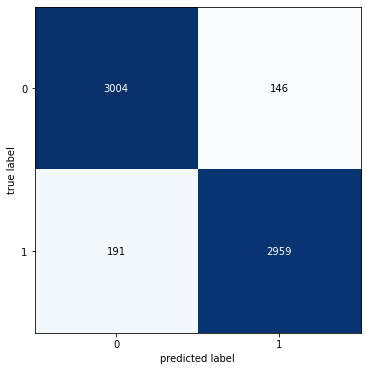

In [50]:
# predictions based on the Naive Bayes classifier 
from mlxtend.plotting import plot_confusion_matrix 

predictions4=pipeline4.predict(x_val)
cm = confusion_matrix(y_val, predictions4) 

print(confusion_matrix(y_val, predictions4))
print('\n')
print(classification_report(y_val, predictions4))


plot_confusion_matrix(cm, figsize=(6,6))

[[4290  210]
 [ 295 4205]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4500
           1       0.95      0.93      0.94      4500

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a619eff90>)

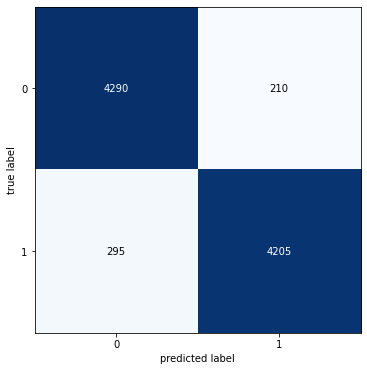

In [51]:
# predictions based on the Naive Bayes classifier 

predictions4=pipeline4.predict(x_test)
cm = confusion_matrix(y_test, predictions4) 

print(confusion_matrix(y_test, predictions4))
print('\n')
print(classification_report(y_test, predictions4))

plot_confusion_matrix(cm, figsize=(6,6))

In [52]:
from xgboost.sklearn import XGBClassifier
distributions = dict(max_depth=[4,5,6], min_child_weight=[4,5,6],  gamma=[i/10.0 for i in range(0,5)], subsample=[i/10.0 for i in range(6,10)], colsample_bytree=[i/10.0 for i in range(6,10)])   
     
model = XGBClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Best Score:  0.9786394557823129
Best Params:  {'subsample': 0.7, 'min_child_weight': 4, 'max_depth': 6, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [58]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV
import xgboost as xgb 

pipeline8=Pipeline([
    ('bow',TfidfVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',xgb.XGBClassifier(subsample=0.7, min_child_weight=4, max_depth=6, gama=0.3, colsample_bytree=0.8))
    ])

pipeline8.fit(x_train,y_train)

Pipeline(steps=[('bow', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, gama=0.3, max_depth=6,
                               min_child_weight=4, subsample=0.7))])

[[3122   28]
 [   4 3146]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3150
           1       0.99      1.00      0.99      3150

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a56fc6210>)

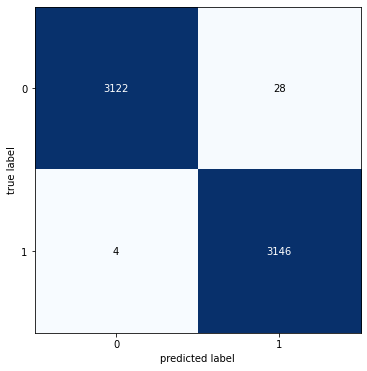

In [59]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_val)
cm = confusion_matrix(y_val, predictions8) 
print(confusion_matrix(y_val, predictions8))
print('\n')
print(classification_report(y_val, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

[[4479   21]
 [  11 4489]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4500
           1       1.00      1.00      1.00      4500

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a56fc8ed0>)

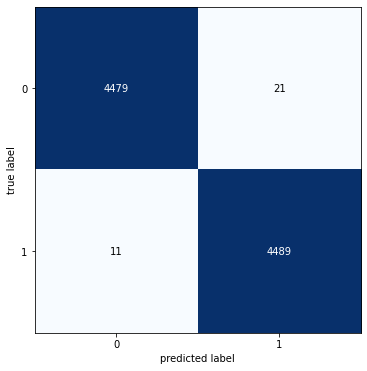

In [60]:
# predictions based on the XGBoost classifier

predictions8=pipeline8.predict(x_test)
cm = confusion_matrix(y_test, predictions8) 
print(confusion_matrix(y_test, predictions8))
print('\n')
print(classification_report(y_test, predictions8))
plot_confusion_matrix(cm, figsize=(6,6))

In [53]:
# using RandomizedSearchCV for finding the best parameters for the classifier
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(n_estimators =[200, 400, 600], max_features=['auto', 'sqrt', 'log2', None], max_depth= [2,3,4, None], criterion=['gini', 'entropy', 'log_loss'])
model = RandomForestClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best Score:  0.9833333333333334
Best Params:  {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [61]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline12=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', n_estimators=600))
    ])

pipeline12.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f7a62b2bf80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        n_estimators=600))])

[[3059   91]
 [  28 3122]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3150
           1       0.97      0.99      0.98      3150

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a5756cf50>)

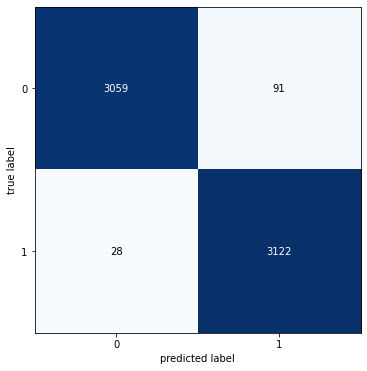

In [62]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_val)
cm = confusion_matrix(y_val, predictions12) 
print(confusion_matrix(y_val, predictions12))
print('\n')
print(classification_report(y_val, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

[[4389  111]
 [  40 4460]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4500
           1       0.98      0.99      0.98      4500

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a57523d90>)

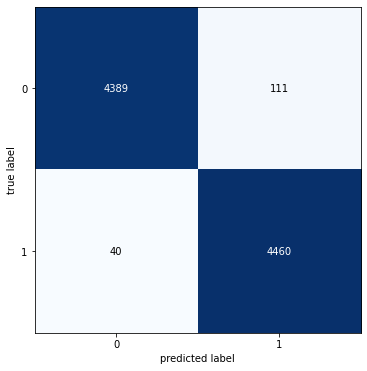

In [63]:
# predictions based on the Random Forest classifier

predictions12=pipeline12.predict(x_test)
cm = confusion_matrix(y_test, predictions12) 
print(confusion_matrix(y_test, predictions12))
print('\n')
print(classification_report(y_test, predictions12))
plot_confusion_matrix(cm, figsize=(6,6))

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# using RandomizedSearchCV for finding the best parameters for the classifier

distributions = dict(C =[0.003, 0.01, 0.03, 0.1],  loss= ['hinge', 'squared_hinge'], n_iter_no_change= [5, 10, 30, 100, 300] )
model = PassiveAggressiveClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5299319727891156
Best Params:  {'n_iter_no_change': 100, 'loss': 'squared_hinge', 'C': 0.03}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline16=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier(C=0.03, loss='squared_hinge', n_iter_no_change=100))
    ])

pipeline16.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f7a62b2bf80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.03, loss='squared_hinge',
                                             n_iter_no_change=100))])

[[3081   69]
 [  47 3103]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3150
           1       0.98      0.99      0.98      3150

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a53b87a50>)

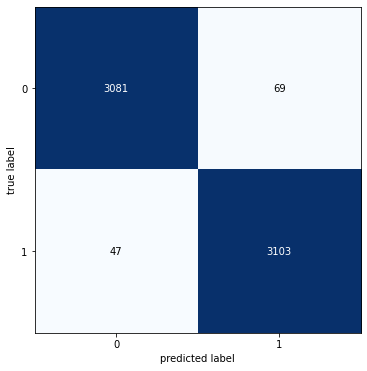

In [65]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_val)
cm = confusion_matrix(y_val, predictions16)
print(confusion_matrix(y_val, predictions16))
print('\n')
print(classification_report(y_val, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

[[4390  110]
 [  76 4424]]


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4500
           1       0.98      0.98      0.98      4500

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a57643050>)

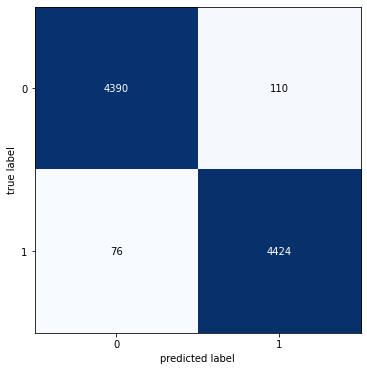

In [66]:
# predictions based on the Passive Aggressive classifier

predictions16=pipeline16.predict(x_test)
cm = confusion_matrix(y_test, predictions16)
print(confusion_matrix(y_test, predictions16))
print('\n')
print(classification_report(y_test, predictions16))
plot_confusion_matrix(cm, figsize=(6,6))

In [55]:
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty= ['l1', 'l2', 'elasticnet', 'none'])
model = LogisticRegression()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5347619047619048
Best Params:  {'solver': 'liblinear', 'penalty': 'l1'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [67]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline20=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(solver='liblinear', penalty='l1'))
    ])

pipeline20.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f7a62b2bf80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

[[3113   37]
 [  42 3108]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3150
           1       0.99      0.99      0.99      3150

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a530fc550>)

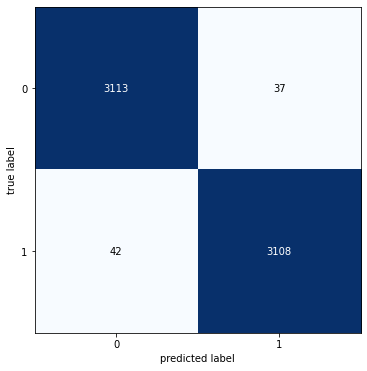

In [68]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_val)
cm = confusion_matrix(y_val, predictions20)
print(confusion_matrix(y_val, predictions20))
print('\n')
print(classification_report(y_val, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

[[4451   49]
 [  52 4448]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4500
           1       0.99      0.99      0.99      4500

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a53904710>)

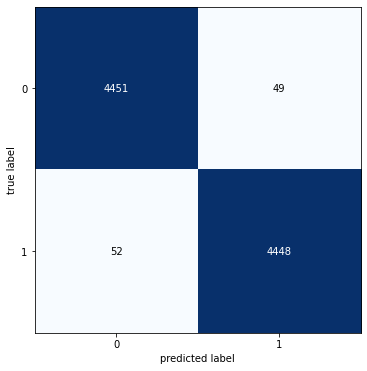

In [69]:
# predictions based on the Logitistic Regression classifier

predictions20=pipeline20.predict(x_test)
cm = confusion_matrix(y_test, predictions20)
print(confusion_matrix(y_test, predictions20))
print('\n')
print(classification_report(y_test, predictions20))
plot_confusion_matrix(cm, figsize=(6,6))

In [56]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(loss= ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge' ],
          penalty = ['l1', 'l2', 'elasticnet', 'none'])
model = SGDClassifier()
model_selection = RandomizedSearchCV(model, distributions, random_state=0)      # using RandomizedSearchCV for finding the best parameters for the classifier

model_selection.fit(x_train_re, y_train_re)
print('Best Score: ', model_selection.best_score_) 
print('Best Params: ', model_selection.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Score:  0.5093197278911565
Best Params:  {'penalty': 'l1', 'loss': 'log'}


In [70]:
# using TfidfVectorizer and Hyper-parameter tuning given by RandomSearchCV

pipeline24=Pipeline([
    ('bow',TfidfVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SGDClassifier(penalty= 'l1', loss='log'))
    ])

pipeline24.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7f7a62b2bf80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(loss='log', penalty='l1'))])

[[3036  114]
 [  79 3071]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3150
           1       0.96      0.97      0.97      3150

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.97      0.97      0.97      6300



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a5268d0d0>)

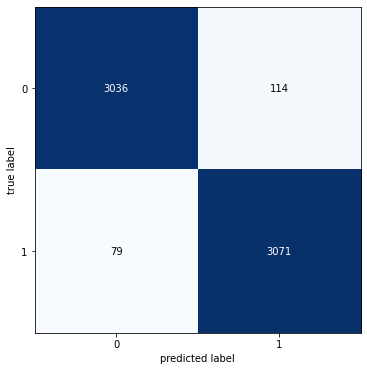

In [71]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_val)

cm = confusion_matrix(y_val, predictions24)
print(confusion_matrix(y_val, predictions24))
print('\n')
print(classification_report(y_val, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))

[[4355  145]
 [ 152 4348]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4500
           1       0.97      0.97      0.97      4500

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7a5364c550>)

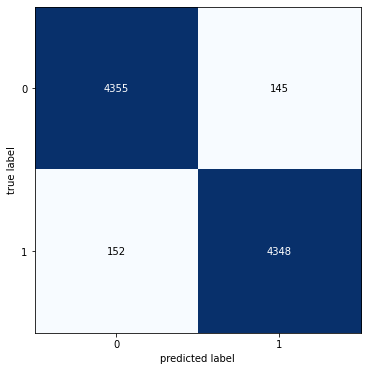

In [72]:
# predictions based on the Naive Bayes classifier 

predictions24=pipeline24.predict(x_test)

cm = confusion_matrix(y_test, predictions24)
print(confusion_matrix(y_test, predictions24))
print('\n')
print(classification_report(y_test, predictions24))

plot_confusion_matrix(cm, figsize=(6,6))